In [1]:
import requests
import pandas as pd
import yaml
import duckdb

In [2]:
DB_PATH = 'weather.duckdb'
TABLE_NAME = 'observations'

con = duckdb.connect(DB_PATH)

In [4]:
df = con.sql("select * from observations").df()
df.sample(3)

,dateutc,tempf,humidity,windspeedmph,windgustmph,maxdailygust,winddir,uv,solarradiation,hourlyrainin,...,dewPoint,feelsLikein,dewPointin,lastRain,tz,date,text,icon,code,alert
1,1752417900000,69.4,99.0,0.0,0.0,10.29,233.0,0.0,61.76,0.0,...,69.11,72.0,53.0,2025-07-13 12:07:00,America/Chicago,2025-07-13 14:45:00,Partly cloudy,//cdn.weatherapi.com/weather/64x64/day/116.png,1003,Flood Watch issued July 13 at 12:46AM CDT unti...
0,1752417720000,69.4,99.0,0.0,0.0,10.29,237.0,0.0,58.94,0.0,...,69.11,72.6,53.4,2025-07-13 12:07:00,America/Chicago,2025-07-13 14:42:00,Partly cloudy,//cdn.weatherapi.com/weather/64x64/day/116.png,1003,Flood Watch issued July 13 at 12:46AM CDT unti...
11,1752442080000,74.8,99.0,0.0,0.0,10.29,232.0,1.0,128.22,0.0,...,74.50,73.4,54.6,2025-07-13 18:36:00,America/Chicago,2025-07-13 21:28:00,Partly cloudy,//cdn.weatherapi.com/weather/64x64/day/116.png,1003,Flood Warning issued July 13 at 7:11AM CDT unt...


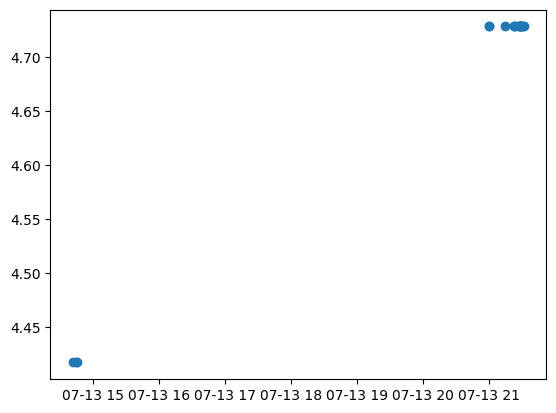

In [19]:
import matplotlib.pyplot as plt
con.close()
plt.scatter(df['date'], df['eventrainin'])

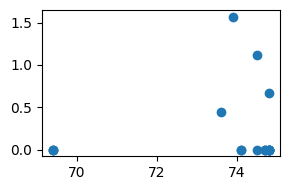

In [13]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from io import BytesIO

def plot_to_bw_pil():
	buf = BytesIO()
	width_px, height_px = 300, 200
	dpi = 100
	fig = plt.figure(figsize=(width_px / dpi, height_px / dpi), dpi=dpi)

	plt.scatter(df['tempf'], df['windspeedmph'])
	plt.tight_layout()
	plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
	buf.seek(0)
	img = Image.open(buf).convert("L")  # grayscale
	bw = img.point(lambda x: 0 if x < 128 else 255, '1')  # threshold to B/W
	return bw

# Create base image
W, H = (800, 480)
image = Image.new("1", (W, H), 255)
draw = ImageDraw.Draw(image)

# Create plot image
plot_img = plot_to_bw_pil()
plot_img = plot_img.resize((300, 200))

# Paste bottom right
image.paste(plot_img, (W - plot_img.width, H - plot_img.height))

image.show()
